# Gradient Descent: Downhill to a Minimum

\begin{equation}
f(x) = \frac{1}{2} x^T S x \text{ with } S=\begin{bmatrix}1&0\\0&b\end{bmatrix}
\end{equation}

We want to minimize the function $f$, updating $x$ to move along with the steepest gradient direction.

\begin{align*}
x_{k+1} = x_k - s \nabla f(x_k)
\end{align*}

where $s$ is the step size, and also called "learning rate" in machine learning language.

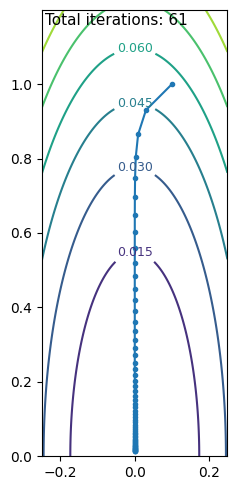

In [97]:
import math
from itertools import count

import numpy as np
from matplotlib import pyplot as plt

b = 0.1
step_size = 0.7
epsilon_sq = 0.000001
iterations = 1

xs = [b]
ys = [1.]

for i in count():
    iterations += 1
    xs.append(xs[-1] - step_size * xs[-1])
    ys.append(ys[-1] - step_size * ys[-1] * b)
    
    if (xs[-1] - xs[-2]) ** 2 + (ys[-1] - ys[-2]) ** 2 <= epsilon_sq:
        break

delta = 0.001
x = np.arange(-0.25, 0.25, delta)
y = np.arange(0., 1.2, delta)
X, Y = np.meshgrid(x, y)
Z = (1 / 2.) * X ** 2 + (1 / 2.) * b * Y ** 2

fig, ax = plt.subplots(figsize=(2.6, 5))
ax.plot(xs, ys, marker='.')
plt.text(-0.24, 1.16, 'Total iterations: ' + str(iterations), color="black", fontsize=11)
CS = ax.contour(X, Y, Z)
ax.set_aspect('equal', adjustable='box')
ax.clabel(CS, inline=True, fontsize=9, manual=[(0., math.sqrt(0.3 * i)) for i in range(1, 5)])
plt.tight_layout()
plt.show()

## Gradient Descent with Exact Line Search

We want to minimize $f$ with steepest gradient descent method, additionally using exact line search where we choose a step size $s$ which give smallest $f$ at a next step.

\begin{align*}
x_{k+1} = x_k - \Big(\frac {2} {1 + b}\Big) \nabla f(x_k)
\end{align*}

Using this method, the quadratic objective function $f$ is decreased by $\Big(\frac {1 - b} {1 + b}\Big)^2$ at each step. We'll show that the convergence speed is faster when $b$ is larger.

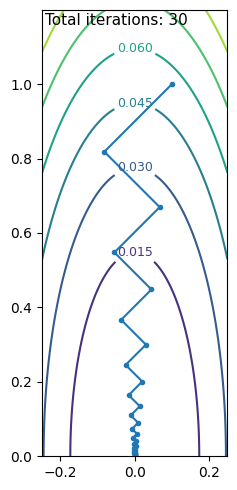

In [98]:
b = 0.1
epsilon_sq = 0.000001
iterations = 1

xs = [b]
ys = [1.]

for i in count():
    iterations += 1
    xs.append(xs[-1] * (b - 1) / (b + 1))
    ys.append(ys[-1] * (1 - b) / (1 + b))
    
    if (xs[-1] - xs[-2]) ** 2 + (ys[-1] - ys[-2]) ** 2 <= epsilon_sq:
        break

delta = 0.001
x = np.arange(-0.25, 0.25, delta)
y = np.arange(0., 1.2, delta)
X, Y = np.meshgrid(x, y)
Z = (1 / 2.) * X ** 2 + (1 / 2.) * b * Y ** 2

fig, ax = plt.subplots(figsize=(2.6, 5))
ax.plot(xs, ys, marker='.')
plt.text(-0.24, 1.16, 'Total iterations: ' + str(iterations), color="black", fontsize=11)
CS = ax.contour(X, Y, Z)
ax.set_aspect('equal', adjustable='box')
ax.clabel(CS, inline=True, fontsize=9, manual=[(0., math.sqrt(0.3 * i)) for i in range(1, 5)])
plt.tight_layout()
plt.show()

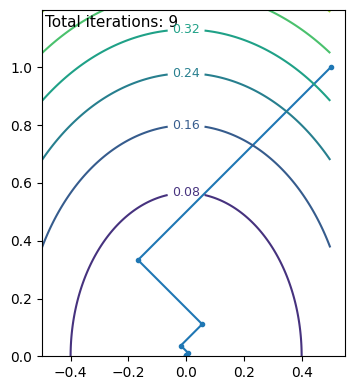

In [99]:
b = 0.5
epsilon_sq = 0.000001
iterations = 1

xs = [b]
ys = [1.]

for i in count():
    iterations += 1
    xs.append(xs[-1] * (b - 1) / (b + 1))
    ys.append(ys[-1] * (1 - b) / (1 + b))
    
    if (xs[-1] - xs[-2]) ** 2 + (ys[-1] - ys[-2]) ** 2 <= epsilon_sq:
        break

delta = 0.001
x = np.arange(-0.5, 0.5, delta)
y = np.arange(0., 1.2, delta)
X, Y = np.meshgrid(x, y)
Z = (1 / 2.) * X ** 2 + (1 / 2.) * b * Y ** 2

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xs, ys, marker='.')
plt.text(-0.49, 1.14, 'Total iterations: ' + str(iterations), color="black", fontsize=11)
CS = ax.contour(X, Y, Z)
ax.set_aspect('equal', adjustable='box')
ax.clabel(CS, inline=True, fontsize=9, manual=[(0., math.sqrt(0.3 * i)) for i in range(1, 5)])
plt.tight_layout()
plt.show()

## Gradient Descent with Momentum

By adding the momentum term at a gradient descent iteration, the convergence speed might be faster. This method add a previous moving direction (momentum) to the current gradient $\nabla f(x_k)$.

\begin{align*}
x_{k+1} &= x_k - s z_k \\
z_k &= \nabla f(x_k) + \beta z_{k-1}
\end{align*}

When involving the momentum term, the function $f$ is decreased by $\Big(\frac {1 - \sqrt{b}} {1 + \sqrt{b}}\Big)^2$ at each step, being much more faster than naive exact line search.

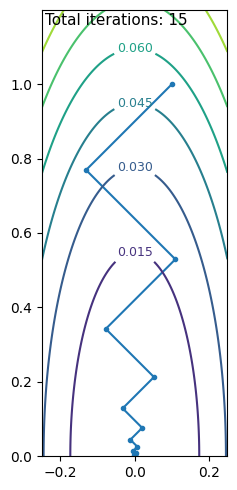

In [100]:
b = 0.1
epsilon_sq = 0.000001
iterations = 1

s_opt = (2. / (1. + math.sqrt(b))) ** 2
beta_opt = ((1. - math.sqrt(b)) / (1. + math.sqrt(b))) ** 2

xs = [b]
ys = [1.]
zx = 0.
zy = 0.

for i in count():
    iterations += 1
    grad_x = xs[-1]
    grad_y = b * ys[-1]
    xs.append(xs[-1] - beta_opt * s_opt * zx - s_opt * grad_x)
    ys.append(ys[-1] - beta_opt * s_opt * zy - s_opt * grad_y)
    zx = grad_x + beta_opt * zx
    zy = grad_y + beta_opt * zy
    
    if (xs[-1] - xs[-2]) ** 2 + (ys[-1] - ys[-2]) ** 2 <= epsilon_sq:
        break

delta = 0.001
x = np.arange(-0.25, 0.25, delta)
y = np.arange(0., 1.2, delta)
X, Y = np.meshgrid(x, y)
Z = (1 / 2.) * X ** 2 + (1 / 2.) * b * Y ** 2

fig, ax = plt.subplots(figsize=(2.6, 5))
ax.plot(xs, ys, marker='.')
plt.text(-0.24, 1.16, 'Total iterations: ' + str(iterations), color="black", fontsize=11)
CS = ax.contour(X, Y, Z)
ax.set_aspect('equal', adjustable='box')
ax.clabel(CS, inline=True, fontsize=9, manual=[(0., math.sqrt(0.3 * i)) for i in range(1, 5)])
plt.tight_layout()
plt.show()

## Gradient Descent with Nesterov Momentum

\begin{equation}
x_{k+1} = x_k + \beta(x_k - x_{k-1}) - s\nabla f(x_k + \gamma (x_k - x_{k-1}))
\end{equation}

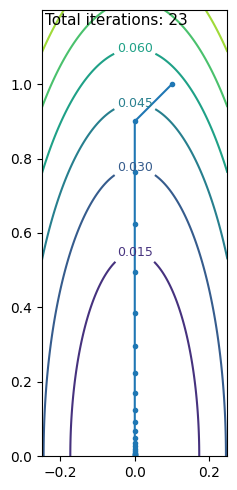

In [101]:
b = 0.1
epsilon_sq = 0.000001
iterations = 2

s_opt = 1.
beta_opt = (1. - math.sqrt(b)) / (1. + math.sqrt(b))
gamma_opt = beta_opt

xs = [b, b - s_opt * b]
ys = [1., 1. - s_opt * b]

for i in count():
    iterations += 1
    grad_x = (1. + gamma_opt) * xs[-1] - gamma_opt * xs[-2]
    grad_y = b * ((1. + gamma_opt) * ys[-1] - gamma_opt * ys[-2])
    xs.append(xs[-1] + beta_opt * (xs[-1] - xs[-2]) - s_opt * grad_x)
    ys.append(ys[-1] + beta_opt * (ys[-1] - ys[-2]) - s_opt * grad_y)
    
    if (xs[-1] - xs[-2]) ** 2 + (ys[-1] - ys[-2]) ** 2 <= epsilon_sq:
        break

delta = 0.001
x = np.arange(-0.25, 0.25, delta)
y = np.arange(0., 1.2, delta)
X, Y = np.meshgrid(x, y)
Z = (1 / 2.) * X ** 2 + (1 / 2.) * b * Y ** 2

fig, ax = plt.subplots(figsize=(2.6, 5))
ax.plot(xs, ys, marker='.')
plt.text(-0.24, 1.16, 'Total iterations: ' + str(iterations), color="black", fontsize=11)
CS = ax.contour(X, Y, Z)
ax.set_aspect('equal', adjustable='box')
ax.clabel(CS, inline=True, fontsize=9, manual=[(0., math.sqrt(0.3 * i)) for i in range(1, 5)])
plt.tight_layout()
plt.show()